# Project: Exploring the Movie Database (TMDB)
## Table of contents
<ul>
<li><a href="#intro"> Introduction </a></li>
<li><a href="#wrangle"> Wrangling </a></li>
<li><a href="#explore"> Expploratory data analysis </a></li>
<li><a href="#conclude"> Conclusions </a></li>
</ul>     

<a id='intro'></a>
## Introduction

I like action, animation, fantasy, and science fiction movies (not necessarily in that order!).
For a personal project I would have liked the know what are the most popular movies in these categories. 
Do other people like these categories as well?
Do these movies make money?

But that would be a personal project. 
I have refrained from these questions in the current project. 
Instead I have followed the standard procedure of wrangling and exploring a given dataset. 
Along the way I have asked questions based upon the features of the dataset. 

1. What are the most popular movies of all time?
2. What are the features associated with these movies?
3. Who are the most popular directors?
4. How is the revenue distribution?
5. What are the top-grossing movies of all time?
6. Who are the directors of top-grossing movies?
7. Is popularity related to revenue?
8. Who are the most productive directors?
9. What's the yearly movie production rate?
10. Which genres have been popular over the years?

In the following, I first describe the data wrangling phase where I load the data into a dataframe, and then assess and clean. 
Then I describe my explorations of the dataset. 
I have explored *popularity, revenue, their interelation, directors, years, *and* genres.* 
Along the way I also find the answers to the questions posed above. 

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangle'></a>
## Wrangle

### Gather

In [2]:
dataset = pd.read_csv('tmdb-movies.csv');
dataset.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We see that there are 21 features associated with each entry. 
The questions I am interested in primarily concerns the popularity and box-office performance of a movie. 
In this respect, some of the features like 'id', 'imdb_id', and 'homepage' are irrelevant. 
In the next phases of the wrangling procedure I shall consider modifying the dataframe to our need. 

### Assess

Because a number of features could not be displayed abobe, let's first generate a list of the features in the dataset. 
This information will be helpful in deciding which features to keep. 

In [3]:
dataset.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

We can safely drop 'id', 'imdb_id', 'budget', 'revenue', and 'homepage' features: 'id' , 'imdb_id', and 'homepage' should have any relevance to the popularity and revenue of a movie, and raw 'budget' and 'revenue' are unnecessary as their adjusted values are also given in the final columns. 
It may be argued that the tagline, keywords, and overview matters for the popularity and revenue of a movie. 
However, this information may be redundant when the genres are specified or just too difficult to use. 
In the following, I have therefore decided to drop these features as well. 
Because the popularity score is already given, I shall not need 'vote_count' and 'vote_average'. 

In [4]:
list_drop = ['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'overview', 'vote_count', 'vote_average', 'keywords']
dataset.drop(list_drop, axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 933.9+ KB


### Clean 

Time to clean data!
We see that come entries for cast are missing. 
Let's have a look at some of these movies. 

#### Cast

In [5]:
dataset[dataset.cast.isnull()].head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
371,0.422901,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,11/25/15,2015,0.0,0.0
441,0.220751,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,2015,0.0,0.0
465,0.201696,Bitter Lake,NaN,Adam Curtis,135,Documentary,BBC,1/24/15,2015,0.0,0.0
536,0.122543,A Faster Horse,NaN,David Gelb,90,Documentary,NaN,10/8/15,2015,0.0,0.0
538,0.114264,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,1/1/15,2015,0.0,0.0


In [6]:
dataset[dataset.cast.isnull()].shape

(76, 11)

We see that adjusted budget and revenue seem to be missing as well. (They cannot be zero!) 
Moreover, there are just 76 such items out of 10754, less than one percent. 
I therefore drop these entries in the following. 

In [7]:
dataset = dataset[pd.notnull(dataset['cast'])]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10790 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10790 non-null float64
original_title          10790 non-null object
cast                    10790 non-null object
director                10752 non-null object
runtime                 10790 non-null int64
genres                  10768 non-null object
production_companies    9800 non-null object
release_date            10790 non-null object
release_year            10790 non-null int64
budget_adj              10790 non-null float64
revenue_adj             10790 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1011.6+ KB


#### Director

The next missing field is 'director'. 
Let's have a look at the missing entries. 

In [8]:
dataset[dataset.director.isnull()].head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
532,0.126594,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,New Wave Entertainment,1/23/15,2015,0.0,0.0
548,0.108072,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,2015,0.0,0.0
556,0.100910,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,2015,0.0,0.0
1032,0.291253,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,2014,0.0,0.0
1054,0.269468,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,NaN,1/19/14,2014,0.0,0.0


In [9]:
dataset[dataset.director.isnull()].shape

(38, 11)

Budget and revenue are missing for these ones as well. 
There are just 38 of them. 
I shall remove them too. 

In [10]:
dataset = dataset[pd.notnull(dataset['director'])]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10752 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10752 non-null float64
original_title          10752 non-null object
cast                    10752 non-null object
director                10752 non-null object
runtime                 10752 non-null int64
genres                  10732 non-null object
production_companies    9780 non-null object
release_date            10752 non-null object
release_year            10752 non-null int64
budget_adj              10752 non-null float64
revenue_adj             10752 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1008.0+ KB


#### Genre

Some genre entries are missing. 

In [11]:
dataset[dataset.genres.isnull()].head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
424,0.244648,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,NaN,10/29/15,2015,0.0,0.0
997,0.330431,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,NaN,10/3/14,2014,0.0,0.0
1712,0.302095,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,2/27/09,2009,0.0,0.0
1897,0.020701,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,NaN,2/27/09,2009,0.0,0.0
2370,0.081892,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,NaN,6/5/10,2010,0.0,0.0


In [12]:
dataset[dataset.genres.isnull()].shape

(20, 11)

And these too have missing budget and revenue and are few in numbers. 
Drop them!

In [13]:
dataset = dataset[pd.notnull(dataset['genres'])]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10732 non-null float64
original_title          10732 non-null object
cast                    10732 non-null object
director                10732 non-null object
runtime                 10732 non-null int64
genres                  10732 non-null object
production_companies    9773 non-null object
release_date            10732 non-null object
release_year            10732 non-null int64
budget_adj              10732 non-null float64
revenue_adj             10732 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1006.1+ KB


#### Production company

Curiously a significant muber of movies have their production company missing. 
Let's take a look. 

In [14]:
dataset[dataset.production_companies.isnull()].head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
228,0.584363,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,1/24/15,2015,0.0,0.0
259,0.476341,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,11/27/15,2015,0.0,0.0
295,0.417191,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84,Family|TV Movie,NaN,11/26/15,2015,0.0,0.0
298,0.370258,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,95,Crime|Horror|Thriller,NaN,9/14/15,2015,0.0,0.0
328,0.367617,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,6/23/15,2015,0.0,0.0


In [15]:
dataset[dataset.production_companies.isnull()].shape

(959, 11)

While the budget and revenue information are missing for these ones as well, they are quite large in number. 
I shall keep them for now. 
I shall disregard them while exploring revenue. 

<a id='explore'></a>
## Exploratory data analysis  

### 1. Popularity

Let's start with popularity. 
Because it is a float, we start with histogram analysis. 
Our goal here is to see the distribution of popularity across movies. 

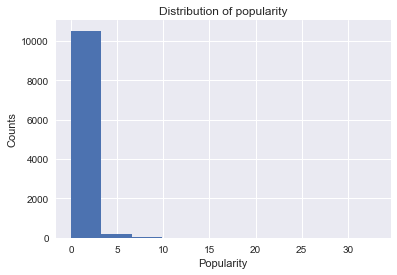

In [16]:
dataset.popularity.hist()
plt.xlabel('Popularity')
plt.ylabel('Counts')
plt.title('Distribution of popularity');

It seems like there are a outlies which have skewed the distribution. 
To confirm this I use boxplot in the following with the "definite" outliers marked red. 

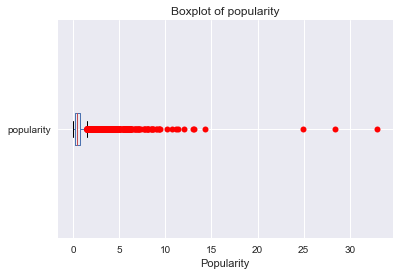

In [17]:
dataset.popularity.plot(kind='box', vert=False, sym='r')
plt.xlabel('Popularity')
plt.title('Boxplot of popularity');

This confirms my suspicion about outliers. 
The outliers are the most popular movies in the database. 
For the time-being I am interested in the distribution of *typical* popularity values. 
To identify the typical points in shall use the five-point summary. 

In [18]:
dataset.popularity.describe()

count    10732.000000
mean         0.652609
std          1.004757
min          0.000188
25%          0.210766
50%          0.387136
75%          0.720621
max         32.985763
Name: popularity, dtype: float64

#### Regular

We shall now determine inner fences in boxplot to select the typical (regular) values. 

In [19]:
# Quartiles and fences
q1_pop = dataset.popularity.describe()['25%']
q3_pop = dataset.popularity.describe()['75%']
iqr_pop = q3_pop - q1_pop
fence_low_pop = q1_pop - 1.5 * iqr_pop 
fence_high_pop = q3_pop + 1.5 * iqr_pop

# Regular and outlier samples
dataset_pop_reg = dataset.query('popularity > {} and popularity < {}'.format(fence_low_pop, fence_high_pop))
dataset_pop_out = dataset.query('popularity < {} or popularity > {}'.format(fence_low_pop, fence_high_pop))
dataset_pop_reg.shape

(9796, 11)

We now plot the histogram of typical values of popularity. 

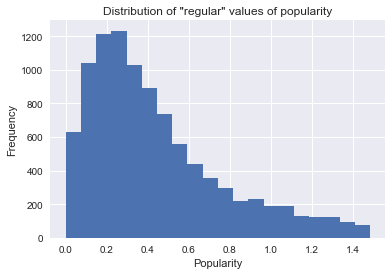

In [20]:
dataset_pop_reg.popularity.plot.hist(bins=20)
plt.xlabel('Popularity')
plt.title('Distribution of "regular" values of popularity');

We see that the typical value of popularity as around 0.3. 
It is however heavily skewed to the right, meaning that more than half of the movies have popularity greater than this. 
To get more exact figures we generate the statistics. 

In [21]:
dataset_pop_reg.popularity.describe()

count    9796.000000
mean        0.438906
std         0.325973
min         0.000188
25%         0.198252
50%         0.351092
75%         0.595587
max         1.483329
Name: popularity, dtype: float64

#### Top 10!

What are the top ten movies in terms of popularity? 
This relates to our first few questions. 
In the following we shall explore features associated with the most popular movies in the list. 

In [22]:
dataset.sort_values(by='popularity', ascending=False).head(10)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
629,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,2014,1.519800e+08,5.726906e+08
630,14.311205,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,2014,1.565855e+08,7.122911e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
631,12.971027,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,136,Action|Adventure|Science Fiction,Marvel Studios,3/20/14,2014,1.565855e+08,6.583651e+08
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,1977,3.957559e+07,2.789712e+09
632,11.422751,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,101,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,10/22/14,2014,1.842182e+07,7.252661e+07
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
633,10.739009,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,123,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,11/18/14,2014,1.151364e+08,6.927528e+08


The list definitely makes sense (although I was somewhat surprised by the entry john Wick!). 
This also answer to the first question: **What are the most popular movies of all time?** 
In the following we explore the numerical features of these movies to answer our second question: **What are the features associated with these movies?**

In [23]:
dataset.sort_values(by='popularity', ascending=False).head(10).describe()

,popularity,runtime,release_year,budget_adj,revenue_adj
count,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01
mean,17.212237,127.000000,2010.700000,1.199485e+08,9.413288e+08
std,8.274145,17.676098,11.851395,5.334061e+07,8.452280e+08
min,10.739009,101.000000,1977.000000,1.842182e+07,7.252661e+07
25%,11.576547,120.250000,2014.000000,1.046841e+08,4.042936e+08
50%,13.041767,122.000000,2014.000000,1.379999e+08,6.755589e+08
75%,22.289652,133.000000,2015.000000,1.554341e+08,1.222407e+09
max,32.985763,169.000000,2015.000000,1.839999e+08,2.789712e+09


These are the numerical characteristics of the top ten popular movies. 
Their runtime seems to a slightly high compared to other movies. 
All of them are pretty recent with the exception of Star Wars (not surprisingly). 
They all are high-budget movies the minimum being around 10 million USD and the median being around 140 million USD. 
All them earned more than 70 million USD the highest one reaching almost 2.8 billion USD (Star Wars!). 

#### Popular movie directors

**Who are the most popular movie directors?** (Third question.) 
There is no unique way to answer this, at least in terms of ranking. 
I could just choose the directors of most popular movies and rank them according to the movies. 
But this will be injustcie to directors who have many movies which are popular. 
In the following I have considered 100 most popular movies and counted the directors. 
Quentin Tanation and Christopher Nolan come on top, each delivering 5 among the 100 most popular movies. 

In [24]:
dataset.sort_values(by='popularity', ascending=False).head(100).director.value_counts()[:10]

Christopher Nolan    5
Quentin Tarantino    5
David Yates          4
Peter Jackson        4
Chris Columbus       3
Francis Lawrence     3
Gore Verbinski       2
Jon Favreau          2
David Fincher        2
Ridley Scott         2
Name: director, dtype: int64

### 2. Revenue

In our discussions on popularity, we saw that popular movies tend to make good money too. 
In this part we shall explore the distribution of revenue across the movies in the database. 
But first, lt us remember that there are many zero entries in the field. 
Let us first see how many of them are there. 

In [25]:
dataset.query('revenue_adj == 0').shape

(5888, 11)

There's a lot of zeros! 
Nevertheless, we still have more than 4000 movies with information on revenue. 
We create a dataframe for the latter movies and explore. 

#### Revenue proper

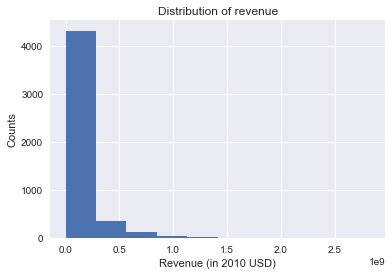

In [26]:
dataset_rev = dataset.query('revenue_adj > 0')
dataset_rev.revenue_adj.hist()
plt.xlabel('Revenue (in 2010 USD)')
plt.ylabel('Counts')
plt.title('Distribution of revenue');

We see that here too the distribution is affected by the presence of outliers. 
To get a visual sense, we use boxplot as before. 

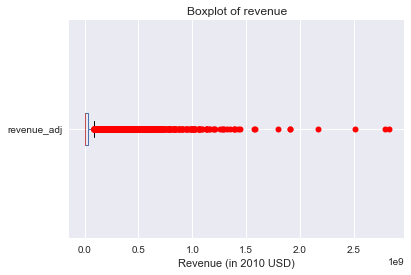

In [27]:
dataset.revenue_adj.plot.box(vert=False, sym='r')
plt.xlabel('Revenue (in 2010 USD)')
plt.title('Boxplot of revenue');

So there are many outliers. 
To get a distribution for the regular entries, I use the parameters of boxplot to separate the outliers. 
This is the same procedure as was the case with popularity. 

In [28]:
# quartiles
q1_rev = dataset_rev.revenue_adj.describe()['25%']
q3_rev = dataset_rev.revenue_adj.describe()['75%']

# interquartile range
iqr_rev = q3_rev - q1_rev

# fences
fence_low_rev  = q1_rev - 1.5 * iqr_rev 
fence_high_rev = q3_rev + 1.5 * iqr_rev

# Regular and outlier samples
dataset_rev_reg = dataset_rev.query('revenue_adj > {} and revenue_adj < {}'.format(fence_low_rev, fence_high_rev))
dataset_rev_out = dataset_rev.query('revenue_adj < {} or revenue_adj > {}'.format(fence_low_rev, fence_high_rev))

# shape of the regular dataset
dataset_rev_reg.shape

(4373, 11)

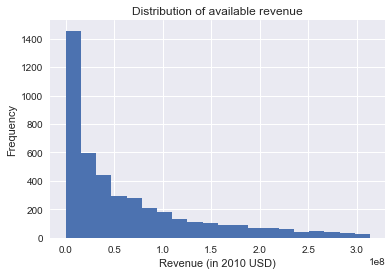

In [29]:
dataset_rev_reg = dataset_rev.query('revenue_adj > {} and revenue_adj < {}'.format(fence_low_rev, fence_high_rev))
dataset_rev_reg.revenue_adj.plot.hist(bins=20)
plt.xlabel('Revenue (in 2010 USD)')
plt.title('Distribution of available revenue');

We see that unlike popularity histogram, there is no peak in the revenue distribution. 
It's more skewed. 
This also answers our fourth question: **How is the revenue distribution?** 
From the above distribution I wondered if the same is true for the top-grossing movies (outliers). 

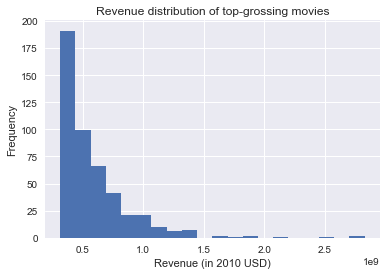

In [30]:
dataset_rev_out = dataset_rev.query('revenue_adj < {} or revenue_adj > {}'.format(fence_low_rev, fence_high_rev))
dataset_rev_out.revenue_adj.plot.hist(bins=20)
plt.xlabel('Revenue (in 2010 USD)')
plt.title('Revenue distribution of top-grossing movies');

Yes, the revenue distribution of the top-grossing movies is no different from the rest. 
But **what are these top-grossing movies?** (Our fifth question.)
I give the list of top ten movies in terms of revenue and their characteristics. 

#### Top ten!

In [31]:
dataset.sort_values(by='revenue_adj', ascending=False).head(10)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,2009,2.408869e+08,2.827124e+09
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,1977,3.957559e+07,2.789712e+09
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,1997,2.716921e+08,2.506406e+09
10594,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1973,3.928928e+07,2.167325e+09
9806,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1975,2.836275e+07,1.907006e+09
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
8889,2.900556,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,4/3/82,1982,2.372625e+07,1.791694e+09
8094,1.136610,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,7/28/95,1995,3.148127e+07,1.583050e+09
10110,2.631987,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,1961,2.917944e+07,1.574815e+09
4361,7.637767,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,2012,2.089437e+08,1.443191e+09


In [32]:
dataset.sort_values(by='revenue_adj', ascending=False).head(50).describe()

,popularity,runtime,release_year,budget_adj,revenue_adj
count,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01
mean,5.594902,136.560000,1997.700000,1.392524e+08,1.317835e+09
std,4.761581,28.385941,16.044899,8.145784e+07,4.451266e+08
min,0.760503,78.000000,1961.000000,2.372625e+07,9.658933e+08
25%,2.758491,121.250000,1985.500000,7.110709e+07,1.033247e+09
50%,4.950633,136.000000,2002.500000,1.392025e+08,1.145192e+09
75%,6.684794,153.500000,2011.000000,1.886158e+08,1.388085e+09
max,32.985763,201.000000,2015.000000,3.683713e+08,2.827124e+09


#### Highest grossing movie directors

**Who directs these movies? ** (Our sixth question)
Following the procedure for popularity we have the following list. 

In [33]:
dataset.sort_values(by='revenue_adj', ascending=False).head(100).director.value_counts()[:10]

Steven Spielberg     7
Peter Jackson        6
George Lucas         4
Michael Bay          4
David Yates          4
Gore Verbinski       3
James Cameron        3
Sam Raimi            3
Christopher Nolan    3
Chris Columbus       3
Name: director, dtype: int64

Definitely not the same as before!

### 3. Popularity versus Revenue

We saw that the most popular and most revenue generating movies need not overlap. 
Here we want see if these is any correlation. 
This is our seventh question:** Is popularity related to revenue?** 
(It should be positive.)

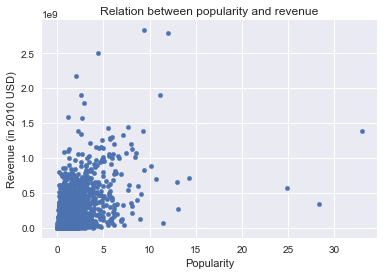

In [34]:
dataset_rev.plot(kind='scatter', x='popularity', y='revenue_adj');
plt.xlabel('Popularity')
plt.ylabel('Revenue (in 2010 USD)')
plt.title('Relation between popularity and revenue');

As the scatter plot portrays, there is definitely a positive correlation. 
The outliers have made the correlation a difficilt to see. 
Also, there is a lot of spread. 
In the following, we ask a related question: How strong is the correlation among the outliers? 
If a movie is an outlier in popularity, what are the chances it will be an outlier in revenue, and vice versa?

In [35]:
# sets of popular and revenue outliers
set_pop_out =  set(dataset_pop_out.original_title)
set_rev_out =  set(dataset_rev_out.original_title)
print('Popular outlier = {} and Revenue outlier = {}'
      .format(len(set_pop_out), len(set_rev_out)))

Popular outlier = 928 and Revenue outlier = 469


In [36]:
# intersect of sets of popular and revenue outliers
print('Intersect: {}'.format(len(set_pop_out.intersection(set_rev_out))))

Intersect: 330


A popular outlier has less than fift percent chance (331/930) of being a revenue outlier whereas a revenue outlier has more than fifty percent (331/470) chance of being a popular outlier. 

### 4. Directors

Let's explore the data on directors. 
(It's a categorical feature compared to the numerical features above.) 
**Who are the most productive directors?** (Eighth question.) 

In [37]:
dataset.director.value_counts()[:10]

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      28
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Wes Craven           19
Name: director, dtype: int64

Not surprisingly, Woody Allen (45) comes at top followed by Clint Eastwood (34) and Steven Spielberg (20). 
Spielberg is closely followed by Martin Scorses (28). 
I wondered how many movies does a director generally make? 

In [39]:
dataset.director.value_counts().describe()

count    5018.000000
mean        2.138701
std         2.529060
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        45.000000
Name: director, dtype: float64

It seems that a director typically makes just one movie!

### 5. Year

 ** What's the yearly movie production rate? ** (Question 9.) 
This is best displayed graphically. 

In [40]:
# select the year column
year = dataset.release_year

# value counts
year_counts = year.value_counts()

# reverse the value counts series to have the maximum on top
year_counts_rev = year_counts.reindex(year_counts.index[::-1])

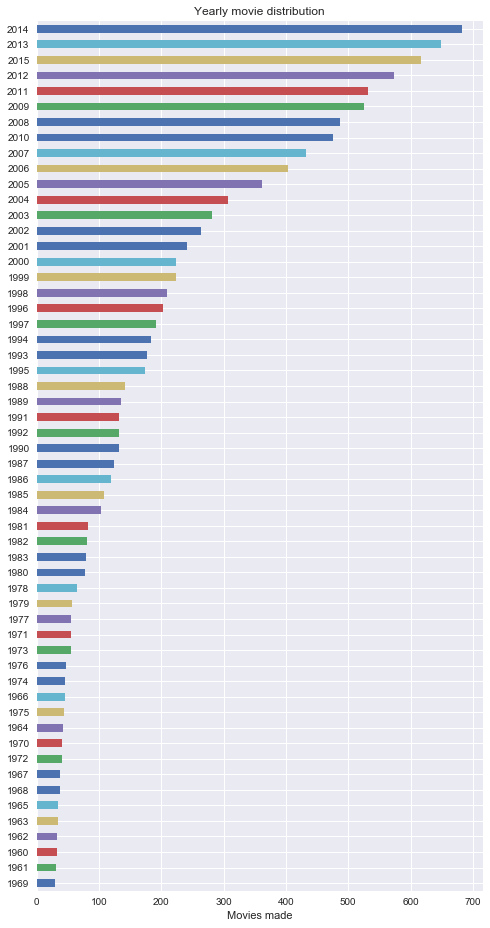

In [41]:
year_counts_rev.plot.barh(figsize=(8, 16))
plt.xlabel('Movies made')
plt.title('Yearly movie distribution');

So the number movies per year is increasing steadily, though not always monotonically. For example, 2010 had less number of movies made than in year 2009 and 2008. Similarly, 2015 had less movies than 2013 and 2014.  

### 6. Genre

Finally, we address the last question: 
**Which genres are most popular from year to year?** 

In [42]:
# earliest and latest years of record
earliest = int(dataset.release_year.describe()['min'])
latest = int(dataset.release_year.describe()['max'])

# For each year, collect the genres and find out
# the frequncy distribution
pop_gen = {}
for year in np.arange(earliest, latest+1):
    # collect the genre strings of a year as a series
    genres_year = dataset.query('release_year == {}'.format(year))['genres']
    genres = []
    # split and store genre strings in 'genres' list
    for genre in genres_year:
        genres.append(str(genre).split('|'))
    
    # make a flat list from 'genres' list 
    # so that we can determine frequencies
    flat_list = [item for sublist in genres for item in sublist]
    # make the flat list into a pandas series 
    # so that we can use the pd.value_counts() function
    genres = pd.Series(flat_list)
    pop_gen[str(year)] = genres.value_counts().idxmax()

# print the most popular genres per year
pop_gen

{'1960': 'Drama',
 '1961': 'Drama',
 '1962': 'Drama',
 '1963': 'Drama',
 '1964': 'Drama',
 '1965': 'Drama',
 '1966': 'Drama',
 '1967': 'Comedy',
 '1968': 'Drama',
 '1969': 'Drama',
 '1970': 'Drama',
 '1971': 'Drama',
 '1972': 'Drama',
 '1973': 'Drama',
 '1974': 'Drama',
 '1975': 'Drama',
 '1976': 'Drama',
 '1977': 'Drama',
 '1978': 'Drama',
 '1979': 'Drama',
 '1980': 'Drama',
 '1981': 'Drama',
 '1982': 'Drama',
 '1983': 'Drama',
 '1984': 'Drama',
 '1985': 'Comedy',
 '1986': 'Drama',
 '1987': 'Comedy',
 '1988': 'Comedy',
 '1989': 'Comedy',
 '1990': 'Drama',
 '1991': 'Drama',
 '1992': 'Drama',
 '1993': 'Drama',
 '1994': 'Comedy',
 '1995': 'Drama',
 '1996': 'Drama',
 '1997': 'Drama',
 '1998': 'Drama',
 '1999': 'Drama',
 '2000': 'Drama',
 '2001': 'Comedy',
 '2002': 'Drama',
 '2003': 'Comedy',
 '2004': 'Drama',
 '2005': 'Drama',
 '2006': 'Drama',
 '2007': 'Drama',
 '2008': 'Drama',
 '2009': 'Drama',
 '2010': 'Drama',
 '2011': 'Drama',
 '2012': 'Drama',
 '2013': 'Drama',
 '2014': 'Drama',
 '

Drama first! Comedy second. And none else! 
This is al the more surprising from to the fact that thriller is the most common genre after drama, and not comedy, as we below. 

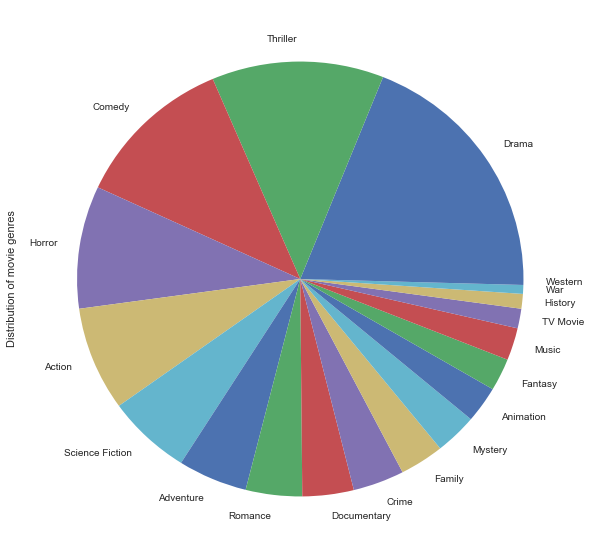

In [43]:
pd.Series(flat_list).value_counts().plot(kind='pie', figsize=(10,10), label='Distribution of movie genres');

<a id='conclude'></a>
## Conclusions

In the above analysis I have explored popularity, revenue, their relation, directors, years, and genres in the movie database (TMDB). 
The prime characteristic of the database is the presence of outlier. 
In popularity, for example, we saw that a handful of movies reached a score as high as 10 whereas more than 3 out of 4 had a score below 1. 

Revenue had a lot of missing values. 
Of the movies that did have the data, we saw that here too the presence of outliers was prominent. 
In fact, the distribution seemed exponential, not even having a peak anywhere. 
In a sense, there is no typical value of revenue. 

Next we considered the relation between popularity and revenue with mulple metrics. 
They are definitely positively correlated on the average, although there is a lot of spread. 
I compared most popular movies with highet-grossing movies. 
A popular outlier has less than fift percent chance (331/930) of being a revenue outlier whereas a revenue outlier has more than fifty percent (331/470) chance of being a popular outlier.
I also looked at the directors of these movies. 
While there is a definite overlap there were some interesting mossions in each. 
Quentin Tarantino came out in top as a popular movie make, but he was not among the top ten revenue generators. 
Steven Spielberg came out in top as a revenue generator, but he was not among the top ten popular directors (in my interpretaion, of course!).

Just for fun, I also looked at the prolificity of directors. 
Woody Allen (45) came in top followed by Clint Eastwood (34) and Steven Spielberg (20). Spielberg is closely followed by Martin Scorses (28). 

More an more movies are being made over the years. 
The progression, however, is not strctly monotonic. 
For example, 2010 had less number of movies made than in year 2009 and 2008. Similarly, 2015 had less movies than 2013 and 2014.  

Let me end the report with a curious observation about genres. 
I looked at the most popular genre in a year. 
Drama came first and comedy second. 
And none else ever made in the list!
This is all the more surprising becase comedy is not the second most frequent genre over all; it is thriller. 
Yet, while comedy came out to be most popular genere many times, thriller never showed up. 
Something to be investigated soon. 

### Limitations

Any data-science investigation is limited by the quality of the dataset and the analysis. 
The current investigation is no exception. 
The dataset for the current investigation has entries for years 1960 to 2015. 
We could not make any concrete comments about movies made before or afterwards. 

The revenue was not list for almost half of the movies. 
So the statistics mentioned in relation to revenue, while representative, may not be robust. 
This is especially true for the outliers for which we may have missed some top-grossing movies. 

While the popularity metric made sense in terms of the movies that we know to be popular, its definition was missing in the description of the dataset. 
While it must be a reasonable function of the various features of a movie, we cannot be sure that it did not favor some types of movies over others. 

On the analysis side, I was not able to explore all the features involved in the dataset and their dependency. 
Given time, it would have been interesting to explore, for example, the influence of cast and directors on popularity, the popularity of different genres, or if a particular genre is getting more and more popular, among others.  